In [1]:
from absl import logging
import tensorflow_hub as hub
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tempfile

C:\Users\conta\git-CVC\Formation\Python\RAG\git-rag\myvenv\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [4]:
print(f"Download model to {os.path.join(tempfile.gettempdir(), "tfhub_modules")}")
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #"https://tfhub.dev/google/universal-sentence-encoder-lite/2" #"https://tfhub.dev/google/universal-sentence-encoder/4" #"https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)
print (f"Module {module_url} loaded in {os.path.join(tempfile.gettempdir(), "tfhub_modules")}")

Download model to C:\Users\conta\AppData\Local\Temp\tfhub_modules



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded in C:\Users\conta\AppData\Local\Temp\tfhub_modules


In [5]:
def embed(input):
  return model(input)

In [6]:
word = "limit"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
print(paragraph)
messages = [sentence, paragraph]
messages

Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.


['I am a sentence for which I would like to get its embedding.',
 "Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be."]

In [7]:
message_embeddings = embed(messages)
message_embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.05080863, -0.01652429,  0.01573781, ...,  0.0097666 ,
         0.03170119,  0.01788119],
       [-0.0283327 , -0.05586221, -0.0129415 , ..., -0.05133028,
         0.01178872,  0.00579202]], shape=(2, 512), dtype=float32)>

In [8]:
for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print(f"Message: {messages[i]}")
  print(f"Embedding size: {len(message_embedding)}")
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:10]))
  print(f"Embedding: {message_embedding_snippet}")

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: 0.0508086271584034, -0.016524292528629303, 0.015737811103463173, -0.042864102870225906, -0.043724533170461655, -0.025361930951476097, -0.0732119083404541, 0.04079890251159668, 0.017488637939095497, 0.012179279699921608
Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: -0.028332699090242386, -0.05586221069097519, -0.012941497378051281, -0.0032210908830165863, -0.07933778315782547, -0.017642218619585037, 0.042264990508556366, 0.008285301737487316, 0.08381327241659164, 0.07212217897176743


In [9]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  plt.show()

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [10]:
messages = [
  # Smartphones
  "J'aime ma télécommande",
  "La télécommande n'est pas bonne.",
  "La télécommande ne marche pas.",

  # Weather
  "Will it snow tomorrow?",
  "Recently a lot of hurricanes have hit the US",
  "Global warming is real",

  # Food and health
  "An apple a day, keeps the doctors away",
  "Eating strawberries is healthy",
  "Is paleo better than keto?",

  # Asking about age
  "I like my baby",
  "what is your age?",
]

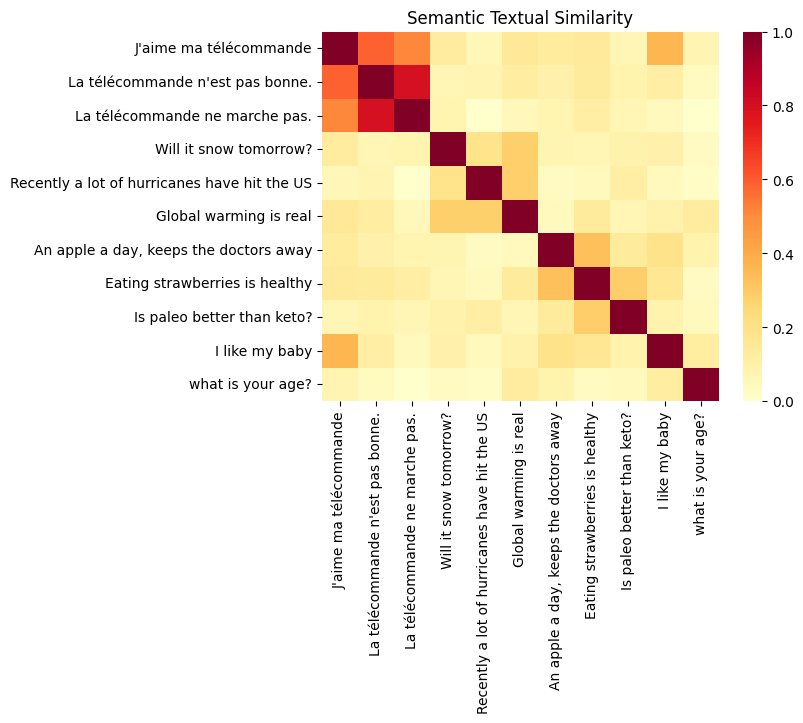

In [11]:
run_and_plot(messages)

In [12]:
print(np.inner(message_embeddings[0],message_embeddings[0]))
print(np.inner(message_embeddings[0],message_embeddings[1]))
print(np.inner(message_embeddings[1],message_embeddings[0]))
corr = np.inner(message_embeddings, message_embeddings)
print(corr)

1.0
0.19231933
0.19231933
[[1.0000002  0.19231936]
 [0.19231936 1.0000001 ]]
